# How we calculated that Kasich is less dead than most

We considered all candidates between 2000 and 2016. We counted the cumulative number of votes for the candidate before and after dropping out of the race. We filtered out minor candidates -- candidates who had fewer than 500,000 votes before they dropped out.

Here's the math in full. This is an R Jupyter notebook.

## Candidates

Here are all our contenders. We built this list by hand.

In [1]:
candidates <- read.csv('candidates.csv')
candidates$dropout_date <- as.Date(candidates$dropout_date, '%m/%d/%Y')
candidates$clinch_date <- as.Date(candidates$clinch_date, '%Y-%m-%d')
candidates

,year,party,candidate,dropout_date,clinch_date
1,2000,GOP,mccain,2000-03-09,NA
2,2000,GOP,forbes,2000-02-10,NA
3,2000,GOP,bauer,2000-02-04,NA
4,2000,GOP,hatch,2000-01-26,NA
5,2000,GOP,keyes,2000-07-25,NA
6,2000,GOP,bush,NA,NA
7,2000,Dem,bradley,2000-03-09,NA
8,2000,Dem,larouche,NA,NA
9,2000,Dem,gore,NA,NA
10,2004,Dem,braun,2004-01-15,NA


## Race results

Here are all races, 2000 to 2016. These were hard to gather.

We got the 2000, 2004 and 2008 data using the scraper in `2008-primary-results/`.

We got the 2012 results by dumping our database from http://elections.huffingtonpost.com/2012/primaries.

We got our 2016 results by parsing the Associated Press results JSON and dumping it, using a bit of code from 
http://elections.huffingtonpost.com/2016/primaries.

In [2]:
results <- read.csv('results.csv')
results$date <- as.Date(results$date, '%m/%d/%Y')
results <- merge(results, candidates, by=c('year', 'party', 'candidate'))
results

,year,party,candidate,state_code,date,n_votes,race_n_votes,dropout_date,clinch_date
1,2000,Dem,bradley,LA,2000-03-14,31385,157551,2000-03-09,NA
2,2000,Dem,bradley,ID,2000-03-07,126,382,2000-03-09,NA
3,2000,Dem,bradley,WV,2000-05-09,46710,253310,2000-03-09,NA
4,2000,Dem,bradley,OK,2000-03-14,34311,134850,2000-03-09,NA
5,2000,Dem,bradley,NH,2000-02-01,70502,154639,2000-03-09,NA
6,2000,Dem,bradley,WA,2000-02-29,93375,297001,2000-03-09,NA
7,2000,Dem,bradley,GA,2000-03-07,46035,284431,2000-03-09,NA
8,2000,Dem,bradley,HI,2000-03-07,235,1315,2000-03-09,NA
9,2000,Dem,bradley,NM,2000-06-06,27204,132280,2000-03-09,NA
10,2000,Dem,bradley,NC,2000-05-02,99796,544922,2000-03-09,NA


Let's add lots of columns

In [3]:
results$n_days_from_dropout <- results$date - results$dropout_date
results$n_days_from_clinch <- results$date - results$clinch_date
results

,year,party,candidate,state_code,date,n_votes,race_n_votes,dropout_date,clinch_date,n_days_from_dropout,n_days_from_clinch
1,2000,Dem,bradley,LA,2000-03-14,31385,157551,2000-03-09,NA,5,NA
2,2000,Dem,bradley,ID,2000-03-07,126,382,2000-03-09,NA,-2,NA
3,2000,Dem,bradley,WV,2000-05-09,46710,253310,2000-03-09,NA,61,NA
4,2000,Dem,bradley,OK,2000-03-14,34311,134850,2000-03-09,NA,5,NA
5,2000,Dem,bradley,NH,2000-02-01,70502,154639,2000-03-09,NA,-37,NA
6,2000,Dem,bradley,WA,2000-02-29,93375,297001,2000-03-09,NA,-9,NA
7,2000,Dem,bradley,GA,2000-03-07,46035,284431,2000-03-09,NA,-2,NA
8,2000,Dem,bradley,HI,2000-03-07,235,1315,2000-03-09,NA,-2,NA
9,2000,Dem,bradley,NM,2000-06-06,27204,132280,2000-03-09,NA,89,NA
10,2000,Dem,bradley,NC,2000-05-02,99796,544922,2000-03-09,NA,54,NA


# Dropout Stats

See how candidates do before and after a dropout.

In [7]:
dropout_results <- aggregate(
    x=results[,c('n_votes', 'race_n_votes')],
    by=results[,c('year', 'party', 'candidate', 'n_days_from_dropout')], FUN=sum
)
dropout_results <- dropout_results[order(dropout_results$n_days_from_dropout),]
dropout_results$cum_votes <- ave(
    dropout_results$n_votes,
    dropout_results[,c('year', 'candidate')],
    FUN=cumsum
)
dropout_results$cum_race_votes <- ave(
    dropout_results$race_n_votes,
    dropout_results[,c('year', 'candidate')],
    FUN=cumsum
)
# Three lines ... hacky but straightforward
just_before_dropout <- aggregate(
    x=dropout_results[dropout_results$n_days_from_dropout <= 0,c('cum_votes', 'cum_race_votes')],
    by=dropout_results[dropout_results$n_days_from_dropout <= 0,c('year', 'candidate')],
    FUN=max
)
names(just_before_dropout)[3] = 'votes0'
names(just_before_dropout)[4] = 'race_votes0'
dropout_results <- merge(dropout_results, just_before_dropout, c('year', 'candidate'))

dropout_results$id <- paste(dropout_results$candidate, dropout_results$year)

colors <- data.frame(
    year=rep(c(2000, 2004, 2008, 2012, 2016), each=2),
    party=rep(c('Dem', 'GOP'), times=5),
    color=c(rep(c('#9facd0', '#bc8c8c'), times=4), '#5c6b95', '#bc5c5c')
)

dropout_results <- merge(dropout_results, colors, c('year', 'party'))
dropout_results$color <- as.character(dropout_results$color)
dropout_results[dropout_results$id == 'kasich 2016','color'] <- '#ca3d28'

dropout_results

,year,party,candidate,n_days_from_dropout,n_votes,race_n_votes,cum_votes,cum_race_votes,votes0,race_votes0,id,color
1,2000,Dem,bradley,12,115317,809648,2322800,10009584,1848897,7039435,bradley 2000,#9facd0
2,2000,Dem,bradley,-2,1684150,6576137,1848725,7029778,1848897,7039435,bradley 2000,#9facd0
3,2000,Dem,bradley,2,21300,121067,1894020,7264924,1848897,7039435,bradley 2000,#9facd0
4,2000,Dem,bradley,16,13,261,2322813,10009845,1848897,7039435,bradley 2000,#9facd0
5,2000,Dem,bradley,68,0,354594,2745375,12647601,1848897,7039435,bradley 2000,#9facd0
6,2000,Dem,bradley,89,27204,132280,2804941,13001094,1848897,7039435,bradley 2000,#9facd0
7,2000,Dem,bradley,-37,70502,154639,71200,156640,1848897,7039435,bradley 2000,#9facd0
8,2000,Dem,bradley,18,4476,11141,2327289,10020986,1848897,7039435,bradley 2000,#9facd0
9,2000,Dem,bradley,0,172,9657,1848897,7039435,1848897,7039435,bradley 2000,#9facd0
10,2000,Dem,bradley,75,32340,220279,2777737,12868814,1848897,7039435,bradley 2000,#9facd0


Now, plot it.

We omit candidates who got fewer than 500,000 votes: otherwise there would be a lot of noise.

Other than noise, it also eliminates Al Sharpton in 2004. Sharpton hovered below 3.5% of the vote before and after he dropped out; Kasich, with >10%, is in a whole other league.

png 
  2

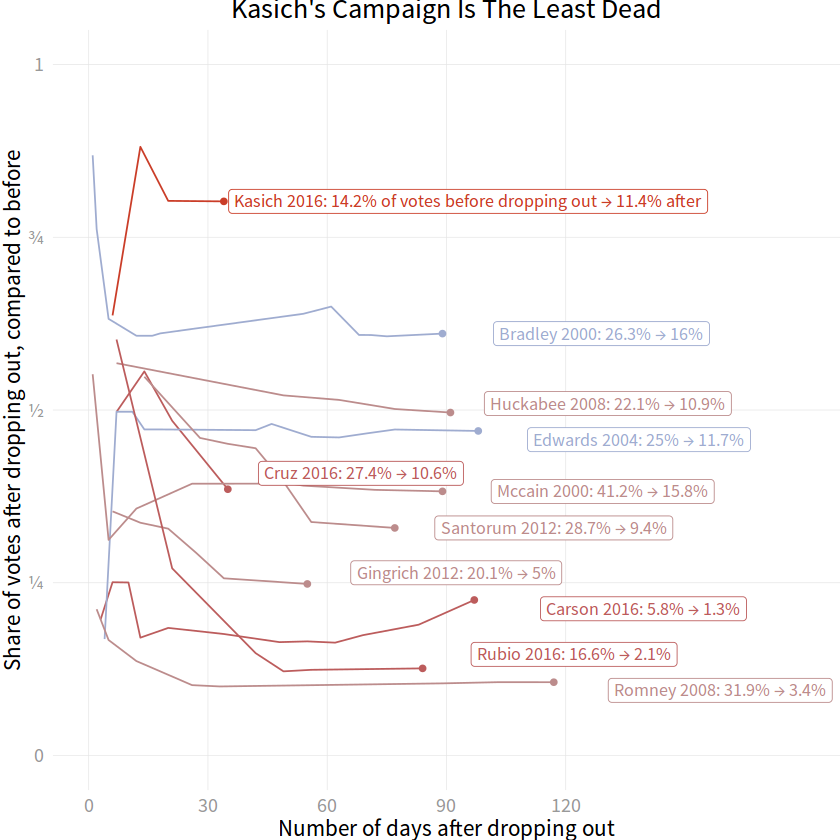

In [12]:
library(ggplot2)
library(ggrepel)
library(extrafont)
loadfonts(quiet=TRUE)

dropout_results$cum_percent <- 100 * dropout_results$cum_votes / dropout_results$cum_race_votes
dropout_results$percent0 <- 100 * dropout_results$votes0 / dropout_results$race_votes0
dropout_results$percent_since_dropout <- 100 * (dropout_results$cum_votes - dropout_results$votes0) / (dropout_results$cum_race_votes - dropout_results$race_votes0)
dropout_results$fraction <- dropout_results$percent_since_dropout / dropout_results$percent0
dropout_results$max_n_days <- ave(dropout_results$n_days_from_dropout, dropout_results$id, FUN=max)

dropout_results <- dropout_results[dropout_results$votes0 >= 500000,]
dropout_results <- dropout_results[dropout_results$n_days_from_dropout > 0,]

capitalize <- function(s) paste0(toupper(substr(s, 1, 1)), substring(s, 2))
    
chart_colors <- dropout_results$color
names(chart_colors) <- chart_colors

chart = ggplot(
    dropout_results,
    aes(x=as.numeric(n_days_from_dropout), y=fraction, group=id, colour=color)
) +
    scale_colour_manual(values=chart_colors) +
    scale_y_continuous(
        name='Share of votes after dropping out, compared to before',
        breaks=c(0, 0.25, 0.5, 0.75, 1),
        labels=c('0', '¼', '½', '¾', 1),
        limits=c(0,1)
    ) +
    scale_x_continuous(
        name='Number of days after dropping out',
        breaks=c(0, 30, 60, 90, 120),
        labels=c('0', '30', '60', '90', '120'),
        limits=c(0,180)
    ) +
    geom_line() +
    geom_point(
        data=dropout_results[dropout_results$n_days_from_dropout == dropout_results$max_n_days,]
    ) +
    geom_label(
        data=dropout_results[dropout_results$n_days_from_dropout == dropout_results$max_n_days & dropout_results$id == 'kasich 2016',],
        aes(label=paste0(capitalize(id), ': ', round(percent0, 1), '% of votes before dropping out → ', round(percent_since_dropout, 1), '% after')),
        family='Source Sans Pro',
        position=position_dodge(1),
        hjust=-0.01
    ) +
    geom_label_repel(
        data=dropout_results[dropout_results$n_days_from_dropout == dropout_results$max_n_days & dropout_results$id != 'kasich 2016',],
        aes(label=paste0(capitalize(id), ': ', round(percent0, 1), '% → ', round(percent_since_dropout, 1), '%')),
        family='Source Sans Pro',
        nudge_x=40,
        segment.color=NA
    ) +
    labs(
        title="Kasich's Campaign Is The Least Dead",
        x='Days since dropping out'
    ) +
    theme_bw() +
    theme(
        legend.position='none',
        text=element_text(size=14, family='Source Sans Pro', color='black'),
        legend.text=element_text(face='bold'),
        rect=element_blank(),
        title=element_text(size=14),
        axis.text=element_text(size=12, color = "#999999"),
        axis.line=element_blank(),
        axis.ticks=element_blank(),
        panel.border=element_blank(),
        panel.grid.minor=element_blank(),
        plot.margin=unit(c(0,0,0,0), 'null'),
        panel.margin=unit(0, 'null')
    )
    
svg("popularity-after-dropout.svg")
plot(chart)
dev.off()
    
chart